# Predict Employee Churn with Decision Trees and Random Forests

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from yellowbrick.target import ClassBalance

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
path = '/content/drive/MyDrive/MyCourses/From GIT repo/Useful-ipynb-projects-master/employee_data.csv'
hr = pd.read_csv(path)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
ProfileReport(hr)

TypeError: ignored

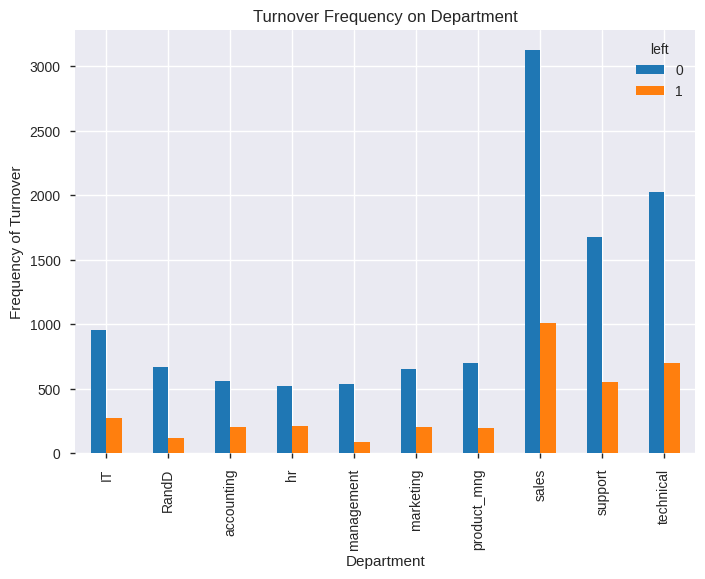

In [6]:
pd.crosstab(hr.Department, hr.left).plot(kind='bar')
plt.title('Turnover Frequency on Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

In [7]:
categ_vars = ['Department', 'salary']
for var in categ_vars:
  categ_list = pd.get_dummies(hr[var], prefix=var)
  hr = hr.join(categ_list)

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [9]:
hr.drop(columns=['Department', 'salary'], axis=1, inplace=True)

In [10]:
X = hr.loc[:,hr.columns != 'left']
y = hr.left

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2,stratify=y)

In [12]:
for k in [X_train, X_test, y_train, y_test]:
  print(k.shape)

(11999, 20)
(3000, 20)
(11999,)
(3000,)


# Build an Interactive Desicion Tree Classifier

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, Image
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from subprocess import call
import matplotlib.image as mpimg

In [15]:
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1, max=30, value=2, continuous_update=False),
              min_split=IntSlider(min=2, max=5, value=2, continuous_update=False),
              min_leaf=IntSlider(min=1, max=5, value=1, continuous_update=False)):
  estimator = DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_leaf=min_leaf,
                                     min_samples_split=min_split
                                     )
  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Decision Tree Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  graph = Source(tree.export_graphviz(estimator,out_file=None,
                                      feature_names = X_train.columns,
                                      class_names=['stay','left'],
                                      filled=True))
  display(Image(data=graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Build an Interactive Random Forest Classifier

In [16]:
@interact
def plot_tree_rf(crit=["gini", "entropy"],
              bootstrap=["True", "False"],
              depth=IntSlider(min=1, max=30, value=3, continuous_update=False),
              min_split=IntSlider(min=2, max=5, value=2, continuous_update=False),
              min_leaf=IntSlider(min=1, max=5, value=1, continuous_update=False),
              forests=IntSlider(min=1, max=200, value=100, continuous_update=False)):
  estimator = RandomForestClassifier(random_state=1,
                                     criterion=crit,
                                     bootstrap=bootstrap,
                                     n_estimators=forests,
                                     max_depth=depth,
                                     min_samples_leaf=min_leaf,
                                     min_samples_split=min_split,
                                     n_jobs = -1,
                                     verbose=False
                                     )
  estimator.fit(X_train, y_train)
  print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Random Forest Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]
  graph = Source(tree.export_graphviz(num_tree,out_file=None,
                                      feature_names = X_train.columns,
                                      class_names=['stay','left'],
                                      filled=True))
  display(Image(data=graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Feature Importance and Evaluation Metrics

In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
rf = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       verbose=False, warm_start=False)

In [ ]:
from yellowbrick.model_selection import FeatureImportances

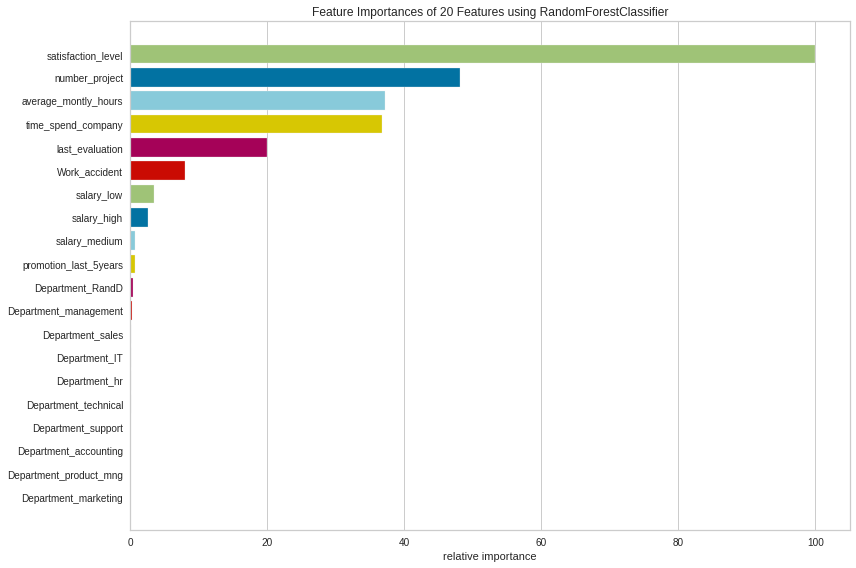

In [ ]:
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show()

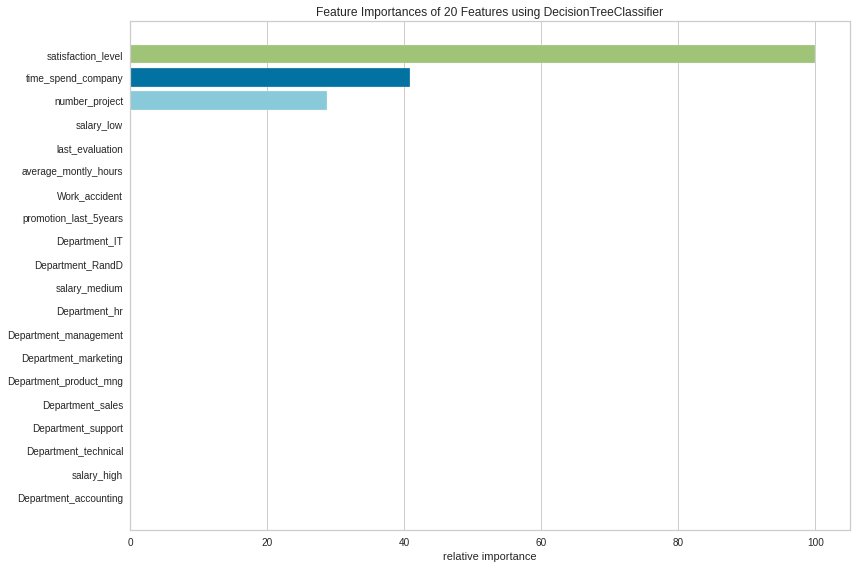

In [ ]:
viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()

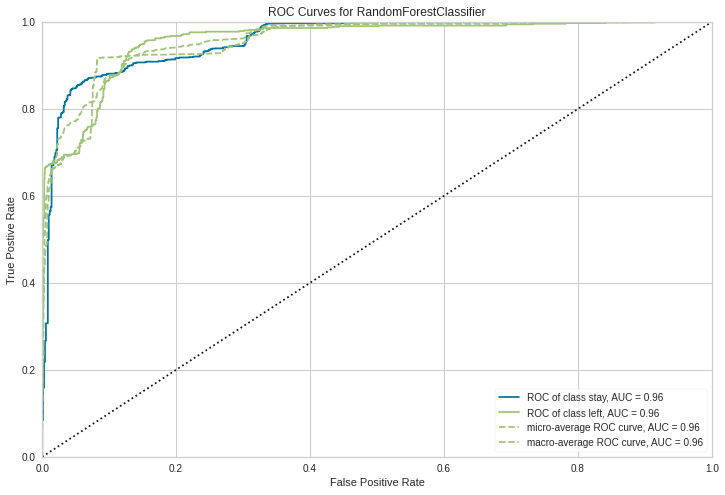

In [ ]:
from yellowbrick.classifier import ROCAUC
viz = ROCAUC(rf, classes=['stay', 'left'])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()